In [1]:
cd F:\PROJECTS\PROJECT_MONKEY SC-RNA SEQ\WORKPLACE\R\

F:\PROJECTS\PROJECT_MONKEY SC-RNA SEQ\WORKPLACE\R


In [3]:
import scanpy as sc
#from scvelo.preprocessing.neighbors import get_connectivities
adata_mouse=sc.read('mouse_p25_scvi.h5ad')

In [4]:
adata_mouse

AnnData object with n_obs × n_vars = 6017 × 32285
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cell_type_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

G:\Miniconda3\envs\coefates\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\coefates\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


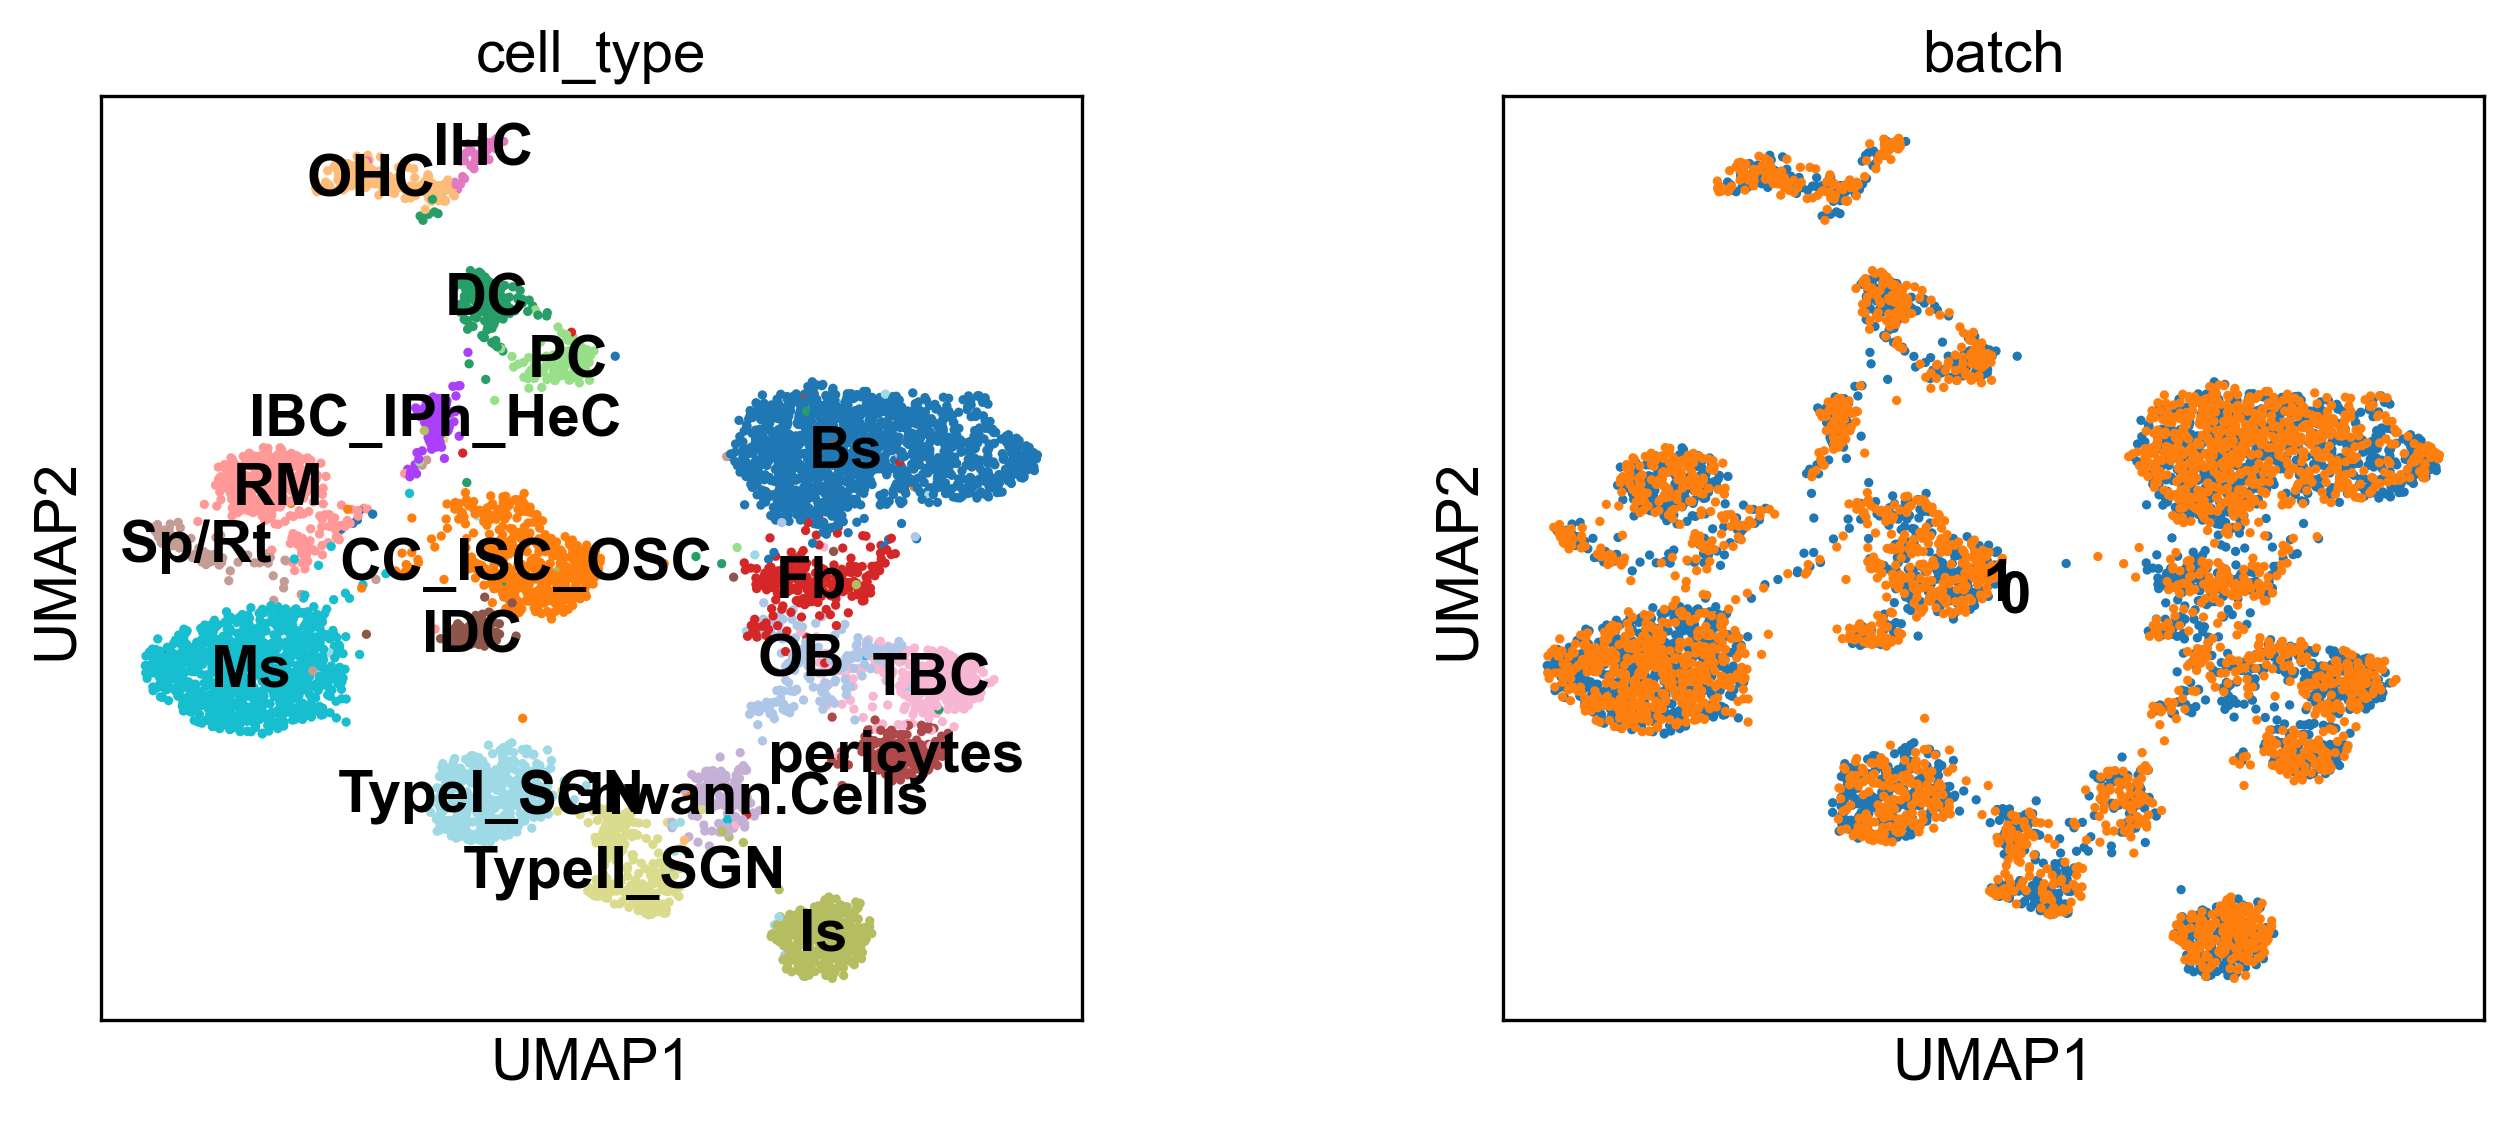

In [5]:
sc.set_figure_params(figsize=(4,4),frameon=True,dpi=150,dpi_save=600)
sc.pl.umap(
    adata_mouse,
    color=['cell_type','batch'], legend_loc='on data',wspace=0.3
    
)#ncols = 1,

G:\Miniconda3\envs\coefates\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\coefates\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


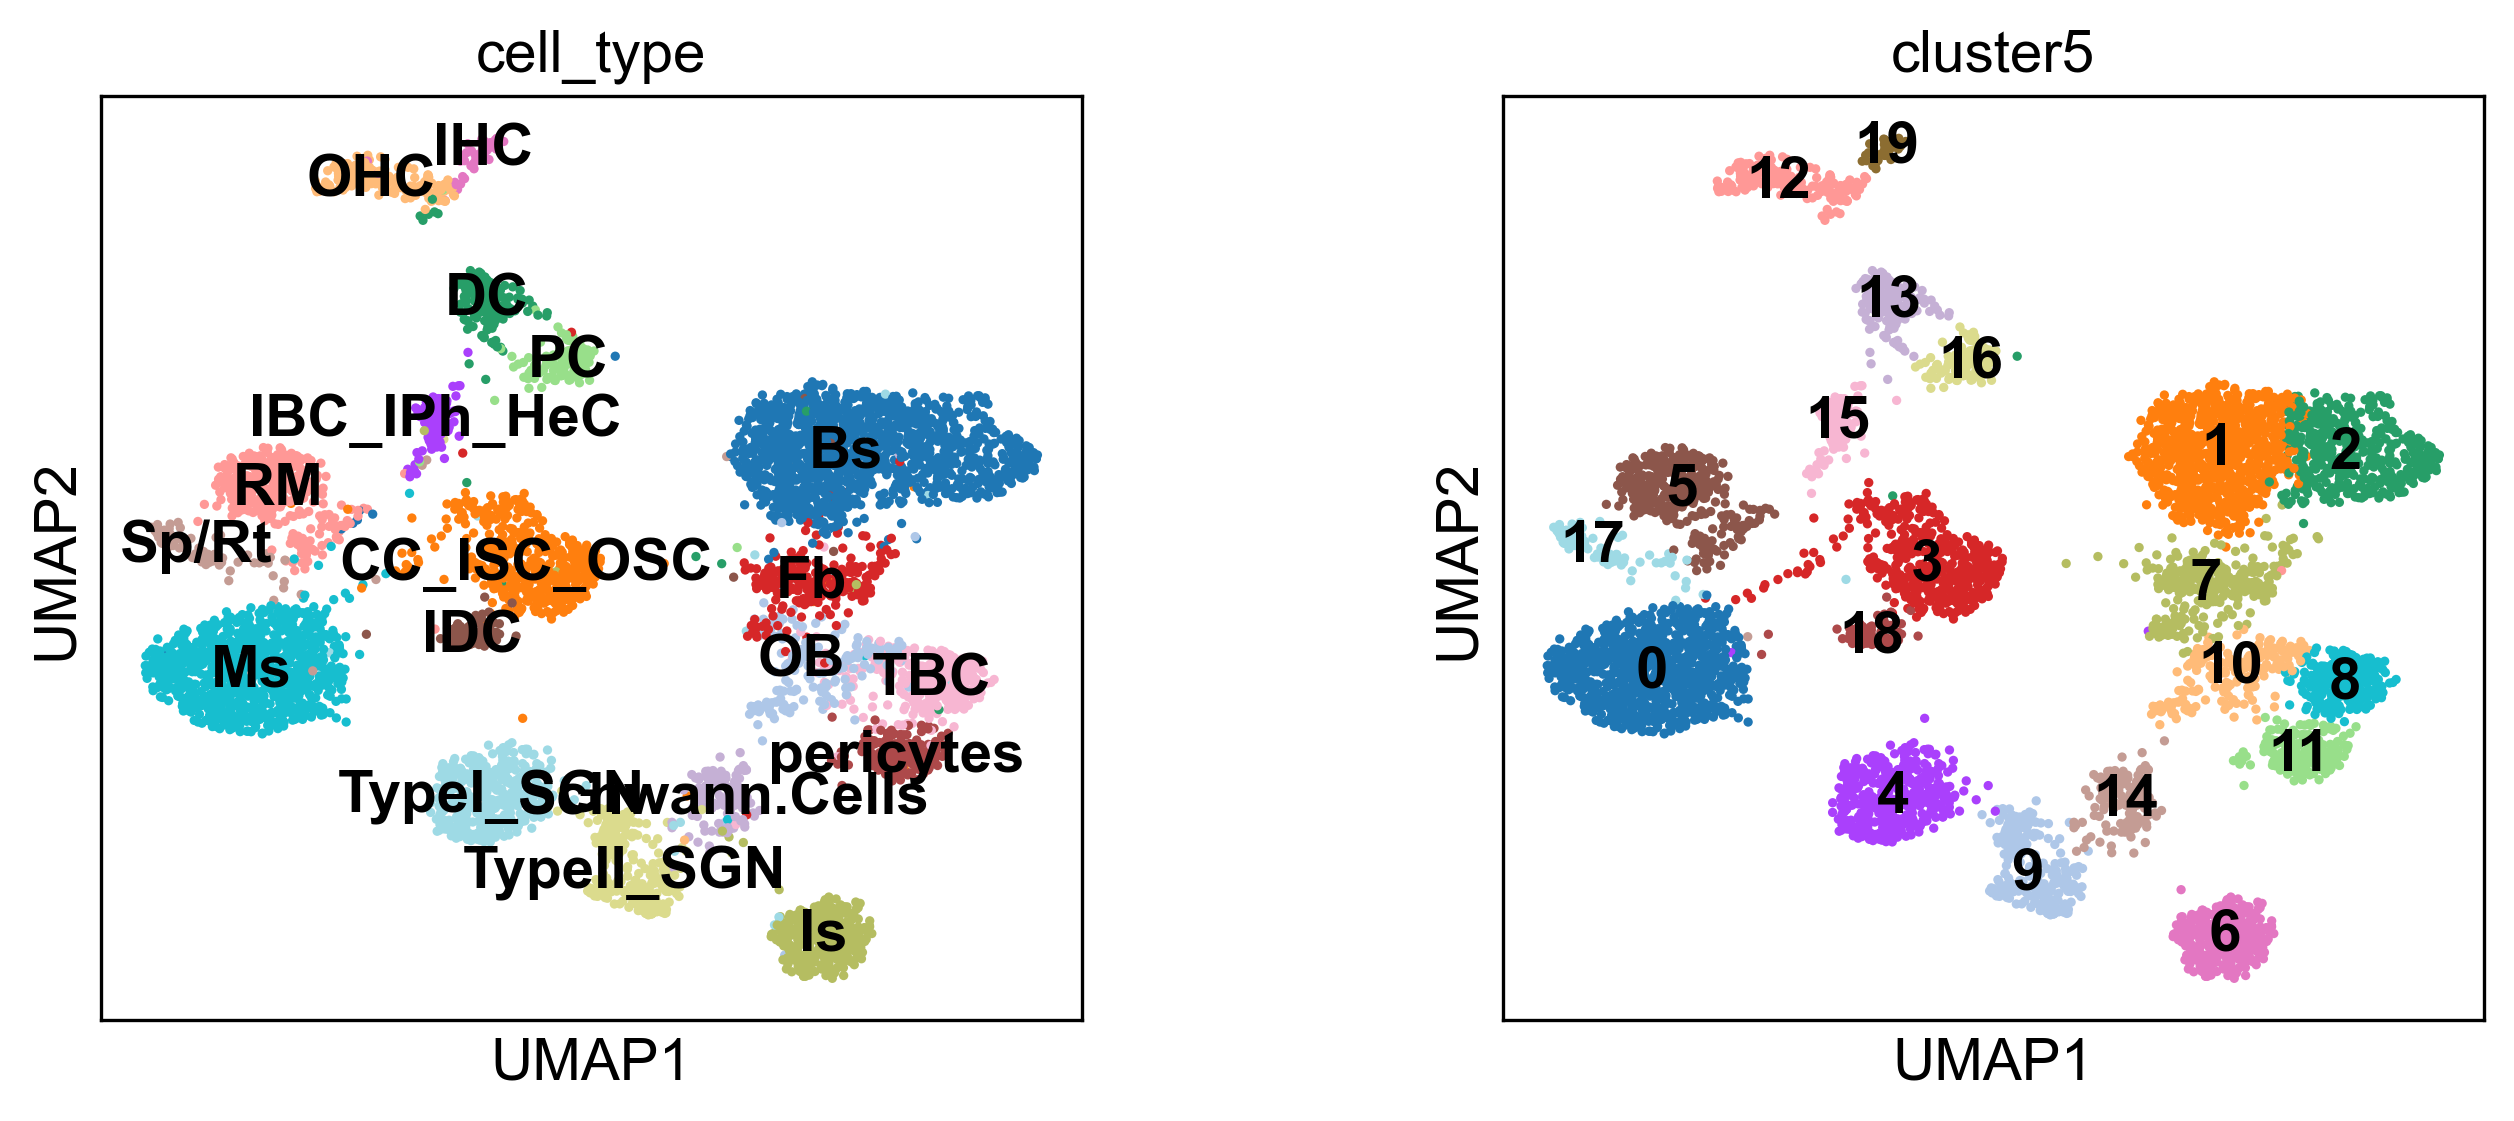

In [6]:
sc.set_figure_params(figsize=(4,4),frameon=True,dpi=150,dpi_save=600)
sc.pl.umap(
    adata_mouse,
    color=['cell_type','cluster5'], legend_loc='on data',wspace=0.3
    
)#ncols = 1,

In [7]:
adata_mm_hc=adata_mouse[adata_mouse.obs['cell_type'].isin(["IHC","OHC"])]
adata_mm_hc

View of AnnData object with n_obs × n_vars = 225 × 32285
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap', 'cluster5_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
from scipy.sparse import csr_matrix
import numpy as np
adata_mm_hc.X=csr_matrix(np.power(10, adata_mm_hc.X.A)-1)

In [9]:
#import scFates as scf
sc.pp.filter_genes(adata_mm_hc,min_cells=1)
sc.pp.normalize_total(adata_mm_hc, target_sum=1e3)
sc.pp.log1p(adata_mm_hc)
#scf.pp.find_overdispersed(adata,plot=True)
sc.pp.highly_variable_genes(adata_mm_hc, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_mm_hc.layers["scaled"]=sc.pp.scale(adata_mm_hc.X,max_value=5,copy=True)
adata_mm_hc.obsm["X_pca"]=sc.pp.pca(adata_mm_hc[:,adata_mm_hc.var.highly_variable].layers["scaled"])
sc.pp.neighbors(adata_mm_hc,n_neighbors=15,n_pcs=15,metric="cosine")


G:\Miniconda3\envs\coefates\lib\site-packages\scanpy\preprocessing\_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
G:\Miniconda3\envs\coefates\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


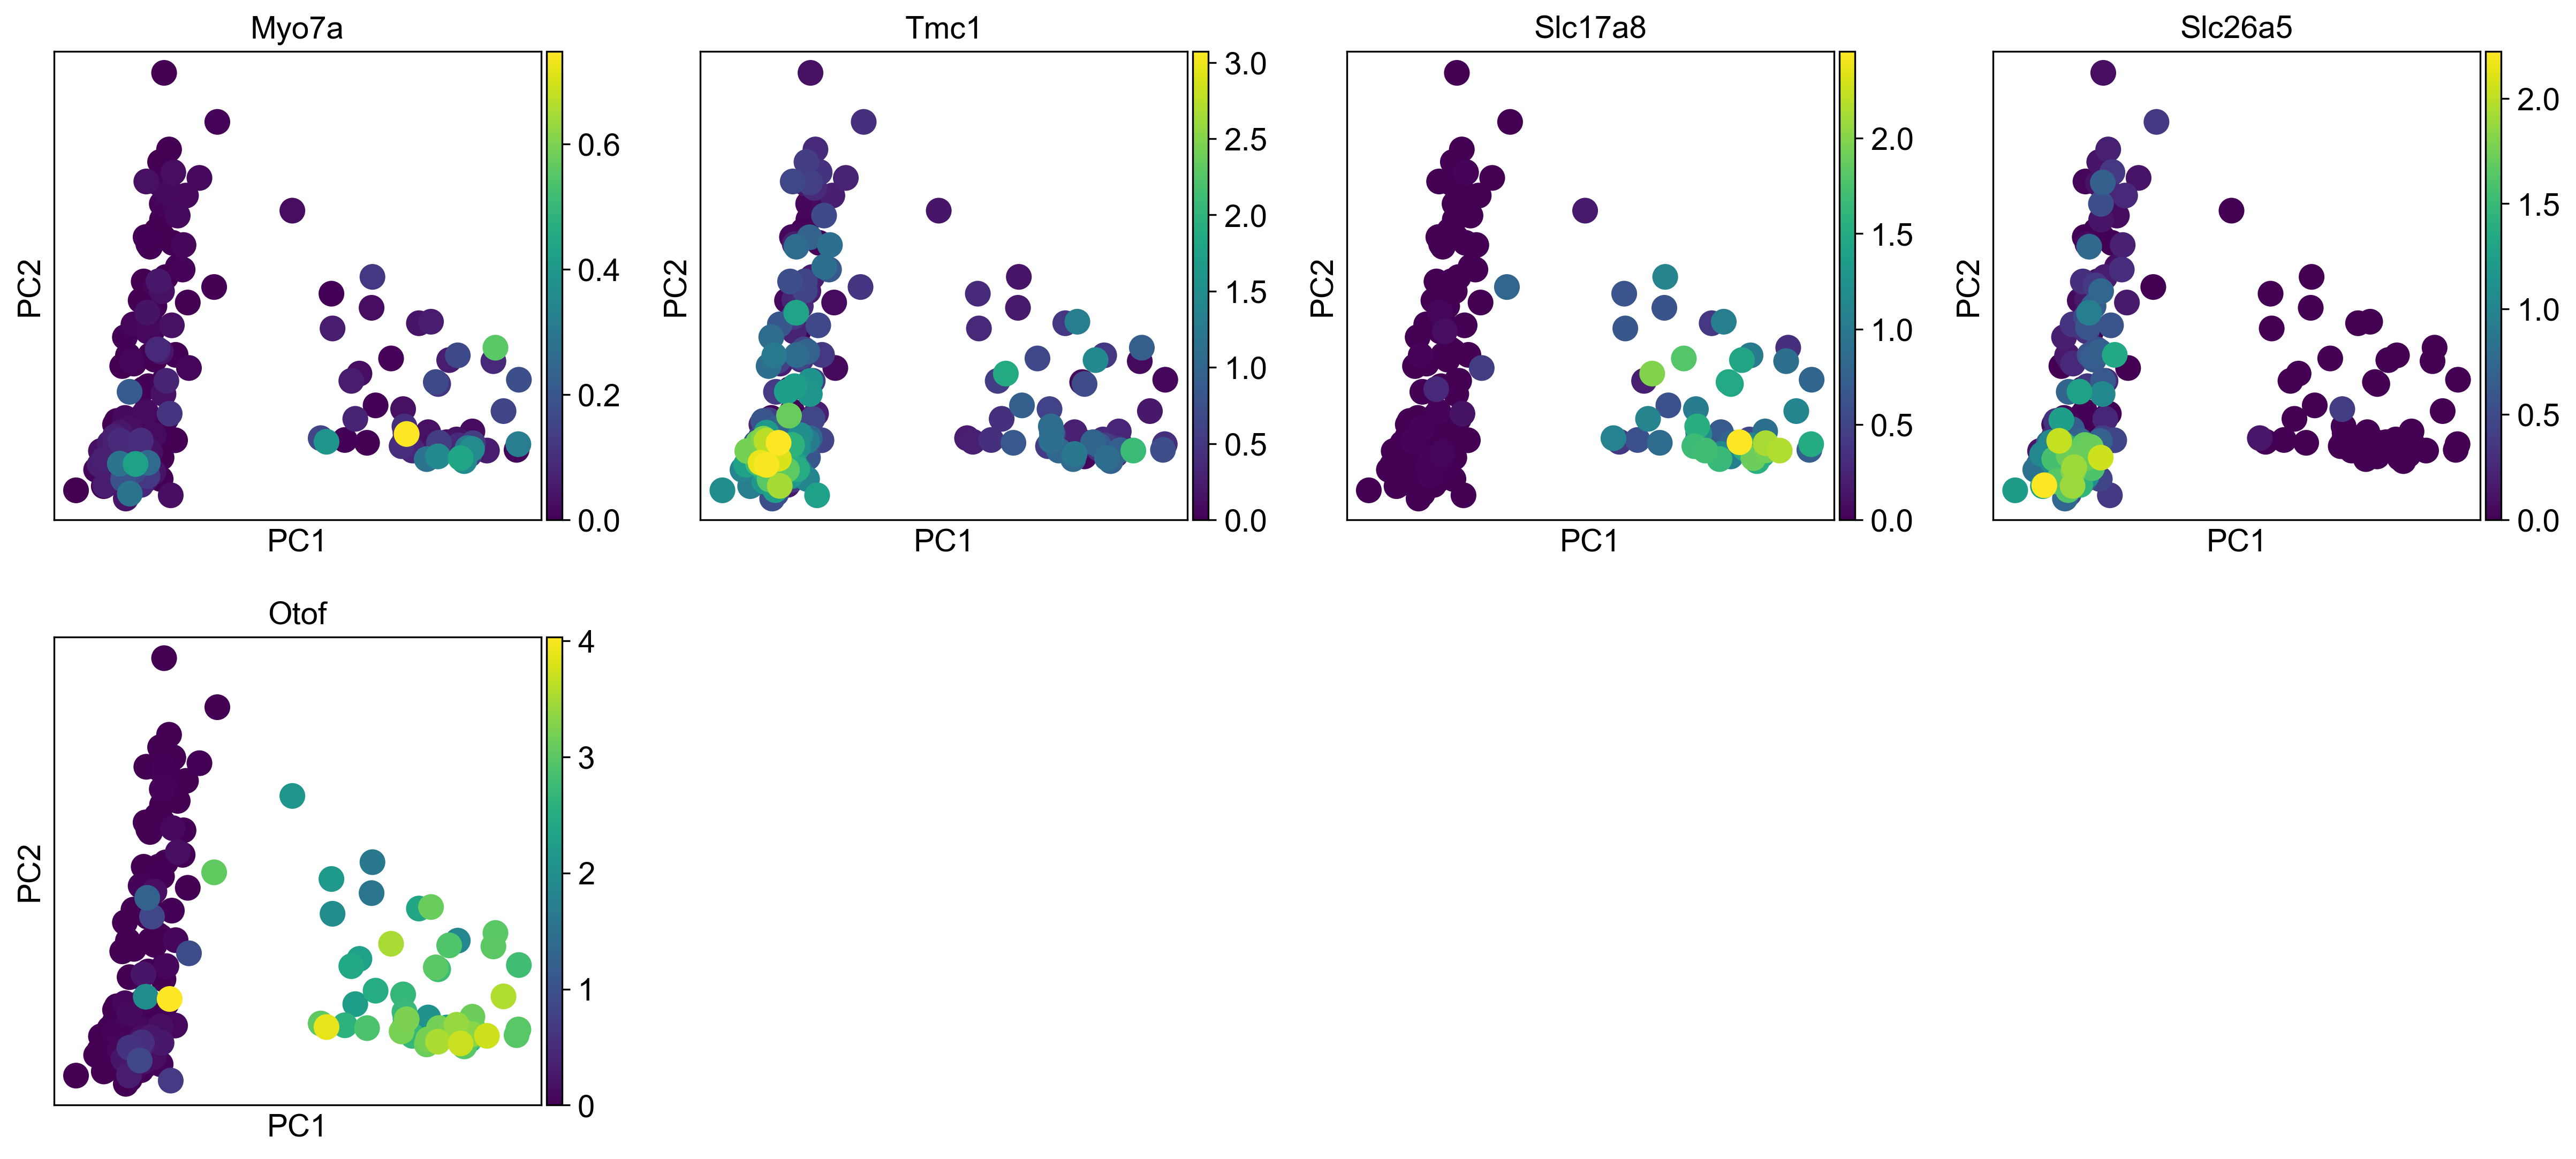

In [10]:
sc.pl.pca(adata_mm_hc, color=['Myo7a','Tmc1','Slc17a8','Slc26a5','Otof' ] )

In [11]:
adata_mm_hc

AnnData object with n_obs × n_vars = 225 × 17181
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap', 'cluster5_colors', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [12]:
sc.tl.umap(adata_mm_hc)

In [13]:
sc.tl.leiden(adata_mm_hc)

In [14]:
adata_mm_hc.obsm["X_umap"][:,0]

array([-0.31344458,  1.6908232 ,  0.71765625, 11.858257  ,  0.2755736 ,
       -2.794092  , 13.382605  ,  0.51081884, 10.072633  , 11.749294  ,
       -0.33348352, -1.0362511 , -5.053677  ,  0.28693596, 12.532353  ,
        2.517742  , 12.735002  , -2.910858  , -1.105722  , -2.164635  ,
       -0.59423757,  1.9866029 , -4.438353  ,  2.0493522 , -0.46177873,
       13.014653  ,  0.7514106 , 10.991732  , 11.312666  , -1.3078655 ,
        1.8589995 , -0.31514323,  0.5678519 , 11.891249  , 10.478915  ,
       -0.40998125, 10.365383  ,  3.2752993 , -4.366291  , 12.256451  ,
        4.773179  , -0.05672407, -4.953416  ,  0.17669664, -3.0228858 ,
       -3.6561313 ,  5.1148    , 10.126171  , -3.982687  , 13.044358  ,
       -1.411946  , -2.5227404 , -3.9700692 , -1.860444  , 11.94715   ,
        4.8486032 , -3.450359  , -2.2876902 ,  4.7225723 ,  1.3969804 ,
       11.435712  ,  0.7084825 , -0.04739534, -1.0093839 , 10.749143  ,
        5.7385287 , -4.2179275 , -4.838671  , -1.6383841 , -0.08

In [15]:
adata_mm_hc.obsm["X_umap"][:,0]=-adata_mm_hc.obsm["X_umap"][:,0]

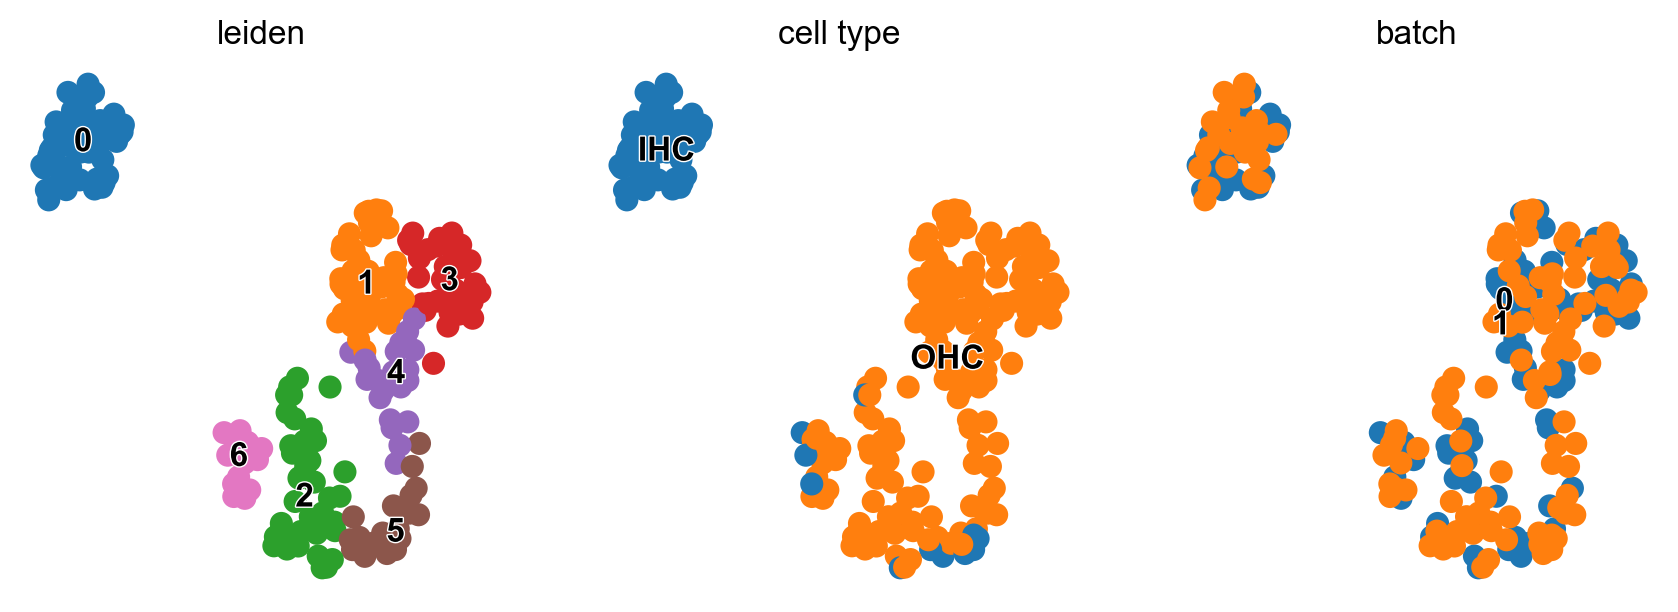

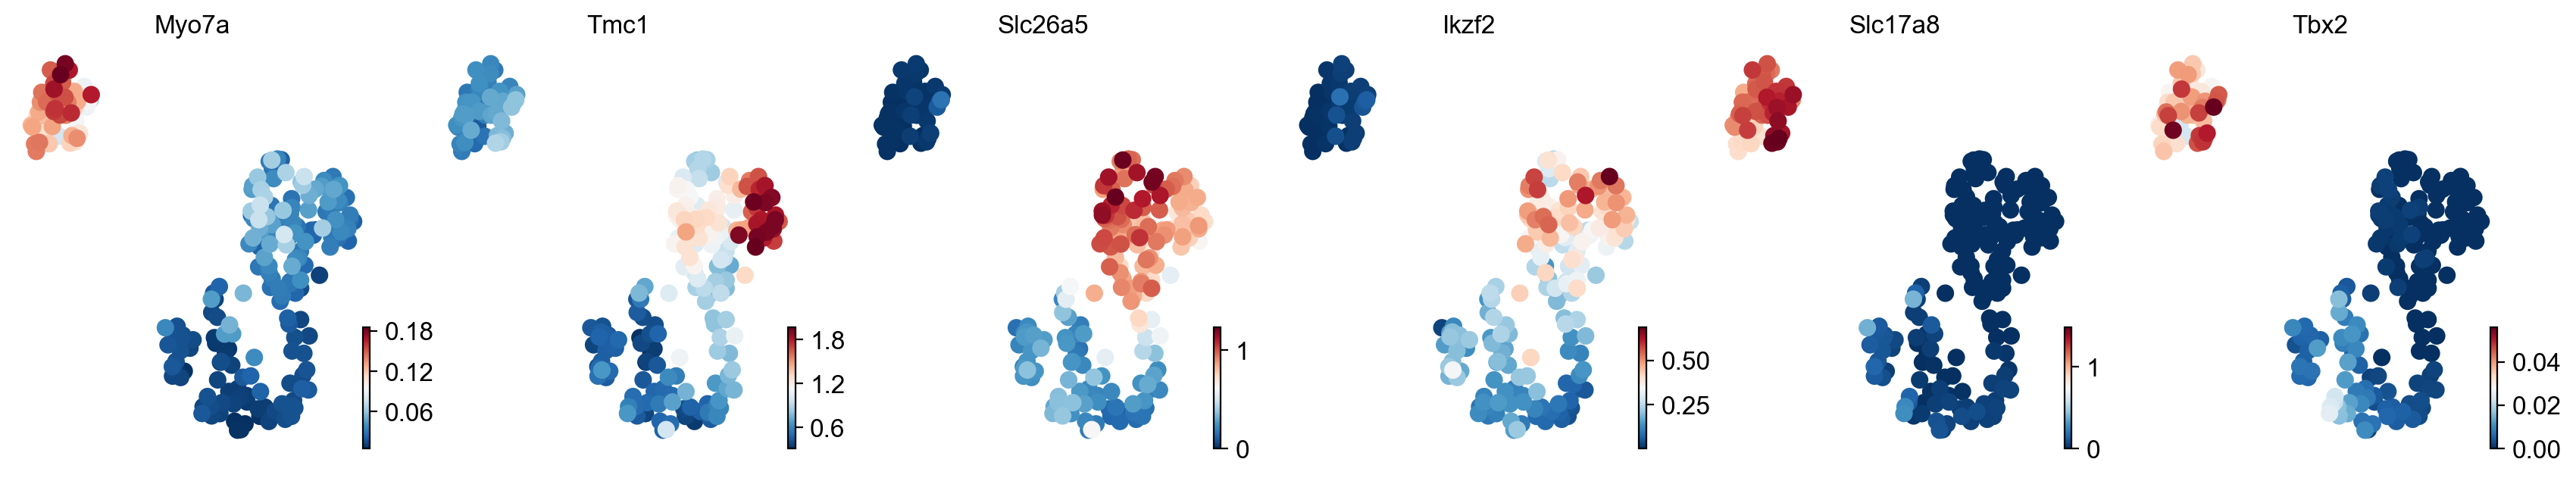

In [17]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5))
scv.pl.umap(adata_mm_hc,color=["leiden","cell_type","batch"],legend_loc='on data')

scv.pl.umap(adata_mm_hc, color=['Myo7a','Tmc1','Slc26a5',"Ikzf2","Slc17a8","Tbx2"],smooth=True)

In [18]:
adata_mm_hc

AnnData object with n_obs × n_vars = 225 × 17181
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap', 'cluster5_colors', 'log1p', 'hvg', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [19]:
adata_mm_hc_sub = adata_mm_hc[adata_mm_hc.obs['leiden'].isin(["0","1","3","4"
    
])]

In [22]:
adata_mm_hc_sub

View of AnnData object with n_obs × n_vars = 147 × 17181
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap', 'cluster5_colors', 'log1p', 'hvg', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [21]:
from scipy.sparse import csr_matrix
import numpy as np
adata_mm_hc_sub.X=csr_matrix(np.power(10, adata_mm_hc_sub.X.A)-1)

In [23]:
#import scFates as scf
sc.pp.filter_genes(adata_mm_hc_sub,min_cells=1)
sc.pp.normalize_total(adata_mm_hc_sub, target_sum=1e3)
sc.pp.log1p(adata_mm_hc_sub)
#scf.pp.find_overdispersed(adata,plot=True)
sc.pp.highly_variable_genes(adata_mm_hc_sub, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_mm_hc_sub.layers["scaled"]=sc.pp.scale(adata_mm_hc_sub.X,max_value=5,copy=True)
adata_mm_hc_sub.obsm["X_pca"]=sc.pp.pca(adata_mm_hc_sub[:,adata_mm_hc_sub.var.highly_variable].layers["scaled"])
sc.pp.neighbors(adata_mm_hc_sub,n_neighbors=15,n_pcs=15,metric="cosine")


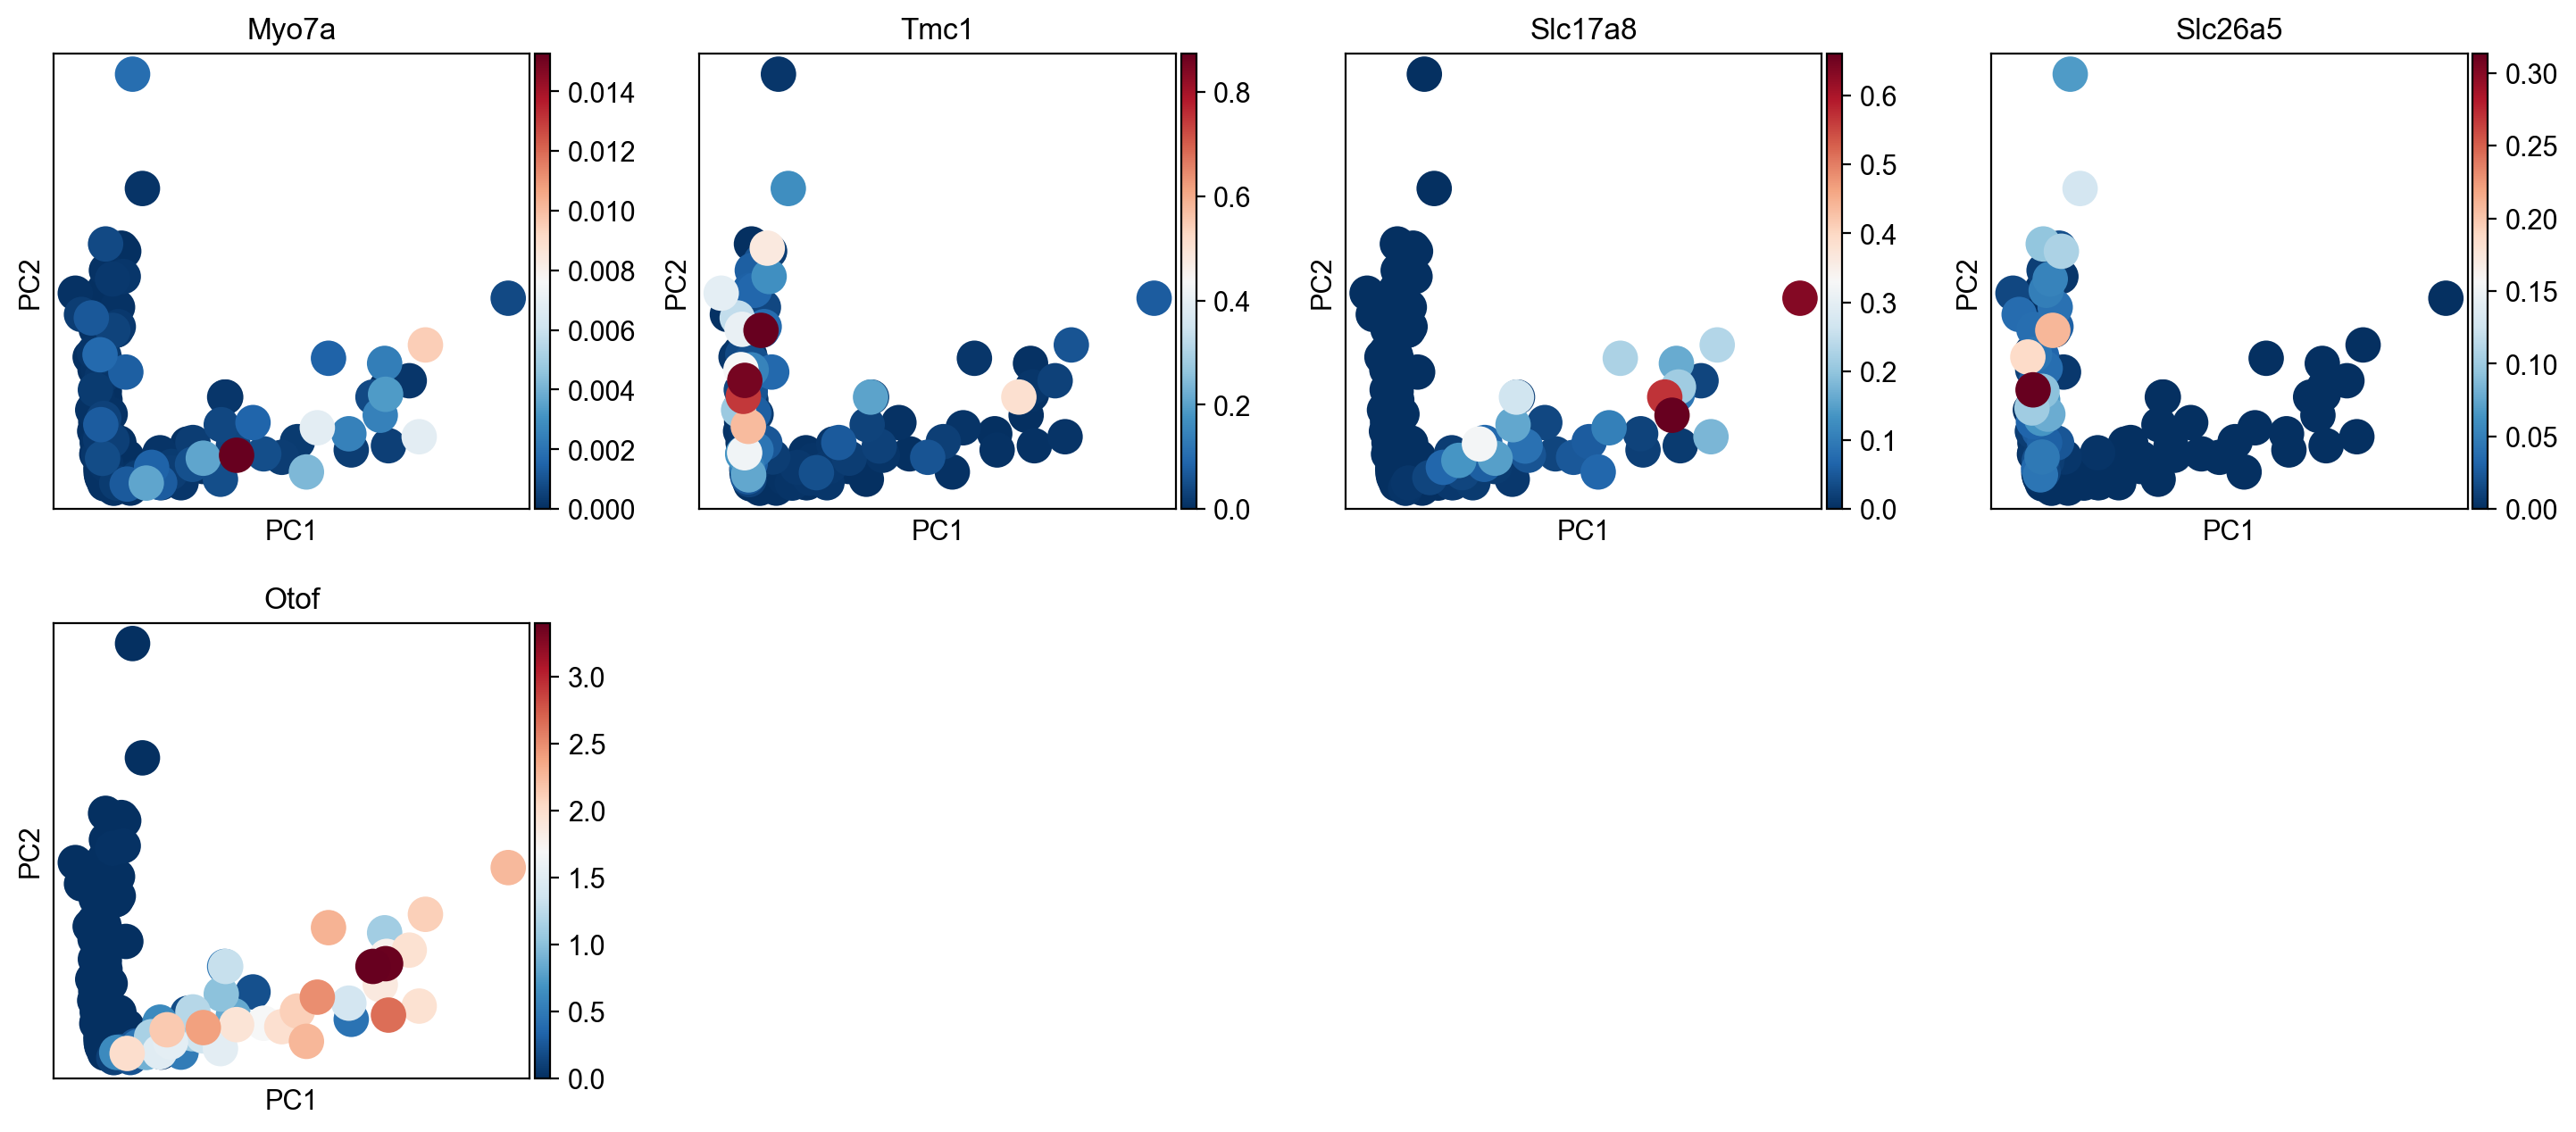

In [24]:
sc.pl.pca(adata_mm_hc_sub, color=['Myo7a','Tmc1','Slc17a8','Slc26a5','Otof' ] )

In [25]:
sc.tl.umap(adata_mm_hc_sub)
sc.tl.leiden(adata_mm_hc_sub)

In [26]:
adata_mm_hc_sub.obsm["X_umap"][:,0]

array([ 6.068874  ,  0.8272857 ,  4.4093547 ,  6.1057262 ,  2.4621186 ,
        5.0964994 , -0.00896446, -3.0590763 ,  6.677484  ,  5.3224897 ,
        7.2140527 ,  6.502794  , -0.2277463 ,  1.5520469 ,  6.5839024 ,
        5.4178443 ,  5.255193  ,  7.397385  ,  6.143267  ,  5.802452  ,
       -2.6300912 , -1.104942  ,  2.4603508 ,  4.995317  ,  6.9956326 ,
        6.3872976 ,  2.5947137 ,  0.44672018,  5.7727137 , -1.0256711 ,
        4.374174  , -1.4409289 ,  6.625531  ,  3.9571986 ,  6.897026  ,
        4.9521637 ,  4.1047125 ,  0.33775127,  7.5678573 , -2.7487895 ,
        4.894318  ,  3.9843767 ,  5.4868217 ,  1.3434596 ,  4.762703  ,
        5.964975  , -1.8644431 ,  5.698624  ,  6.1957455 ,  4.4540706 ,
       -1.6547793 ,  4.1808057 ,  4.1924977 ,  4.975994  ,  6.4402328 ,
        1.1152779 , -2.6064582 ,  5.7168913 ,  5.115802  ,  4.2873445 ,
        6.3394575 ,  5.564736  , -3.172162  ,  4.50646   ,  5.3039265 ,
       -1.4565948 ,  6.0033307 , -2.7760339 , -2.6752472 , -1.20

In [27]:
adata_mm_hc_sub.obsm["X_umap"][:,0]=-adata_mm_hc_sub.obsm["X_umap"][:,0]

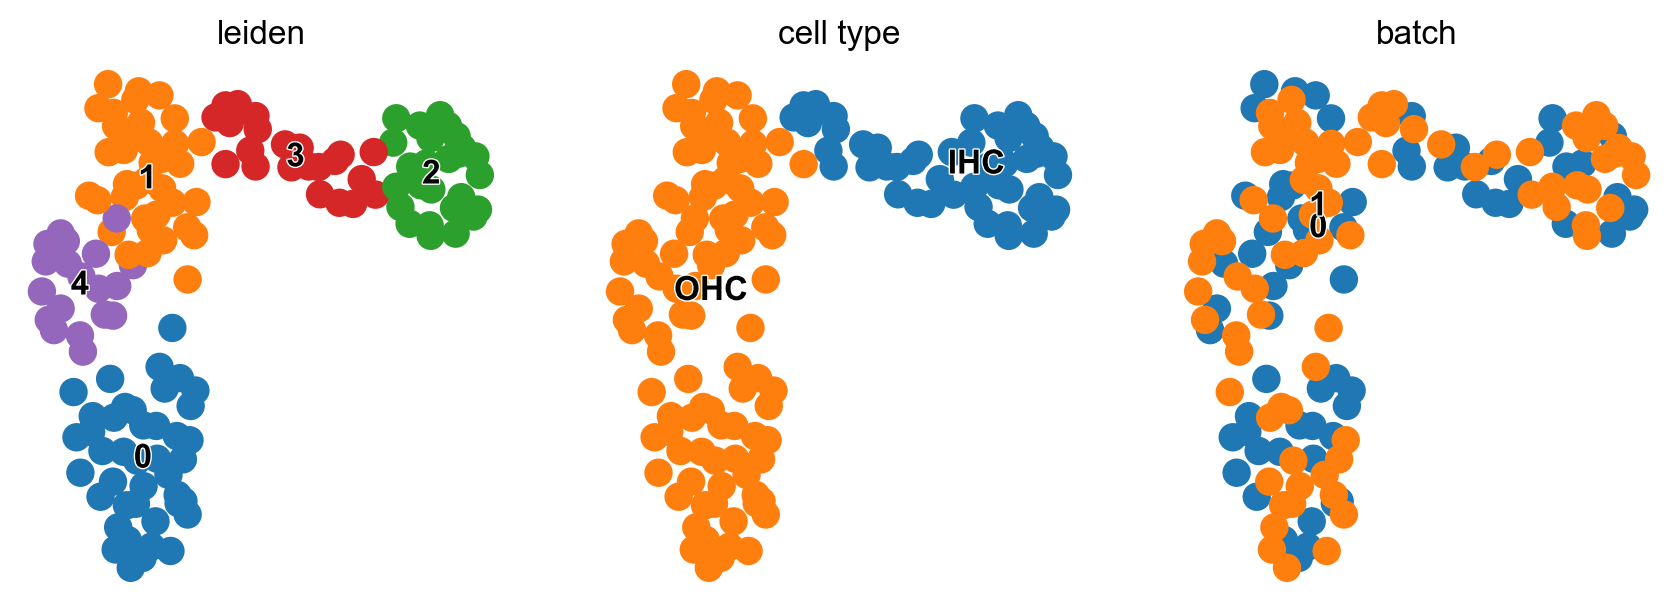

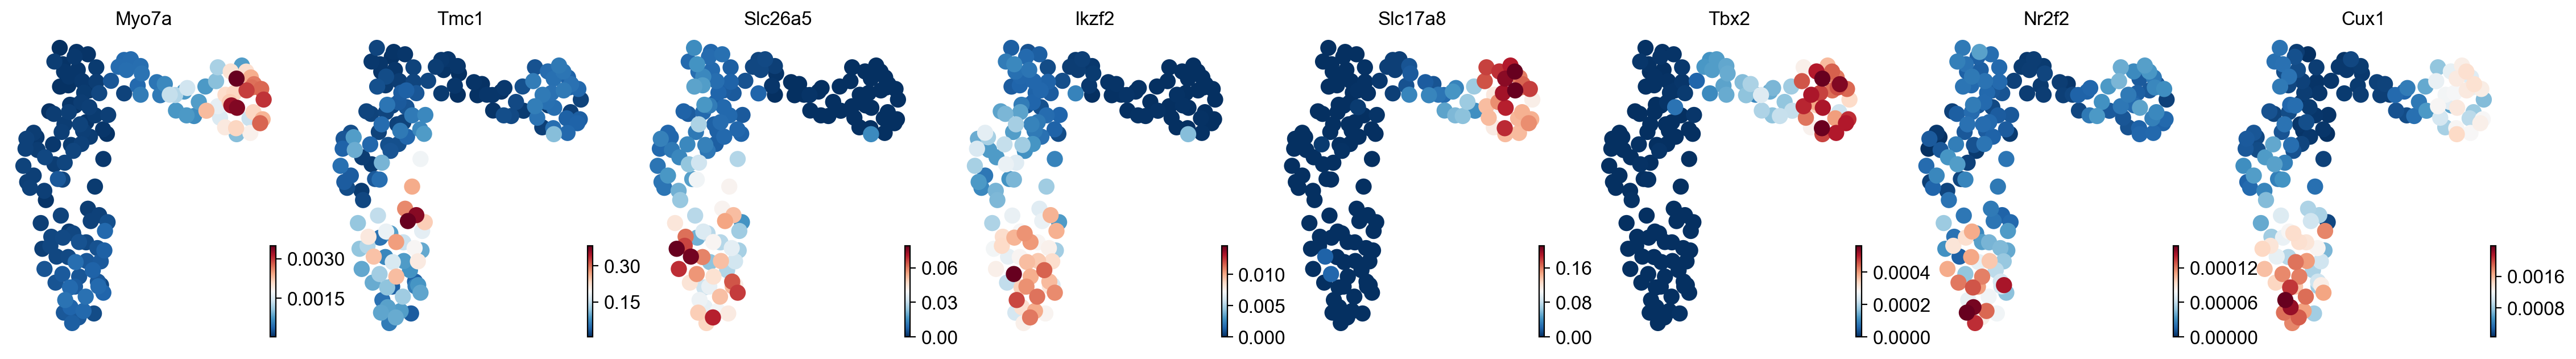

In [35]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5))
scv.pl.umap(adata_mm_hc_sub,color=["leiden","cell_type","batch"],legend_loc='on data')

scv.pl.umap(adata_mm_hc_sub, color=['Myo7a','Tmc1','Slc26a5',"Ikzf2","Slc17a8","Tbx2","Nr2f2"],smooth=True)

In [36]:
scv.set_figure_params(figsize=(4,4))
import matplotlib.pyplot as plt

In [105]:
IHC=["Slc17a8","Tbx2","Calb2","Atp2a3"]
OHC=["Slc26a5","Ikzf2","Kcnq4","Ocm"]

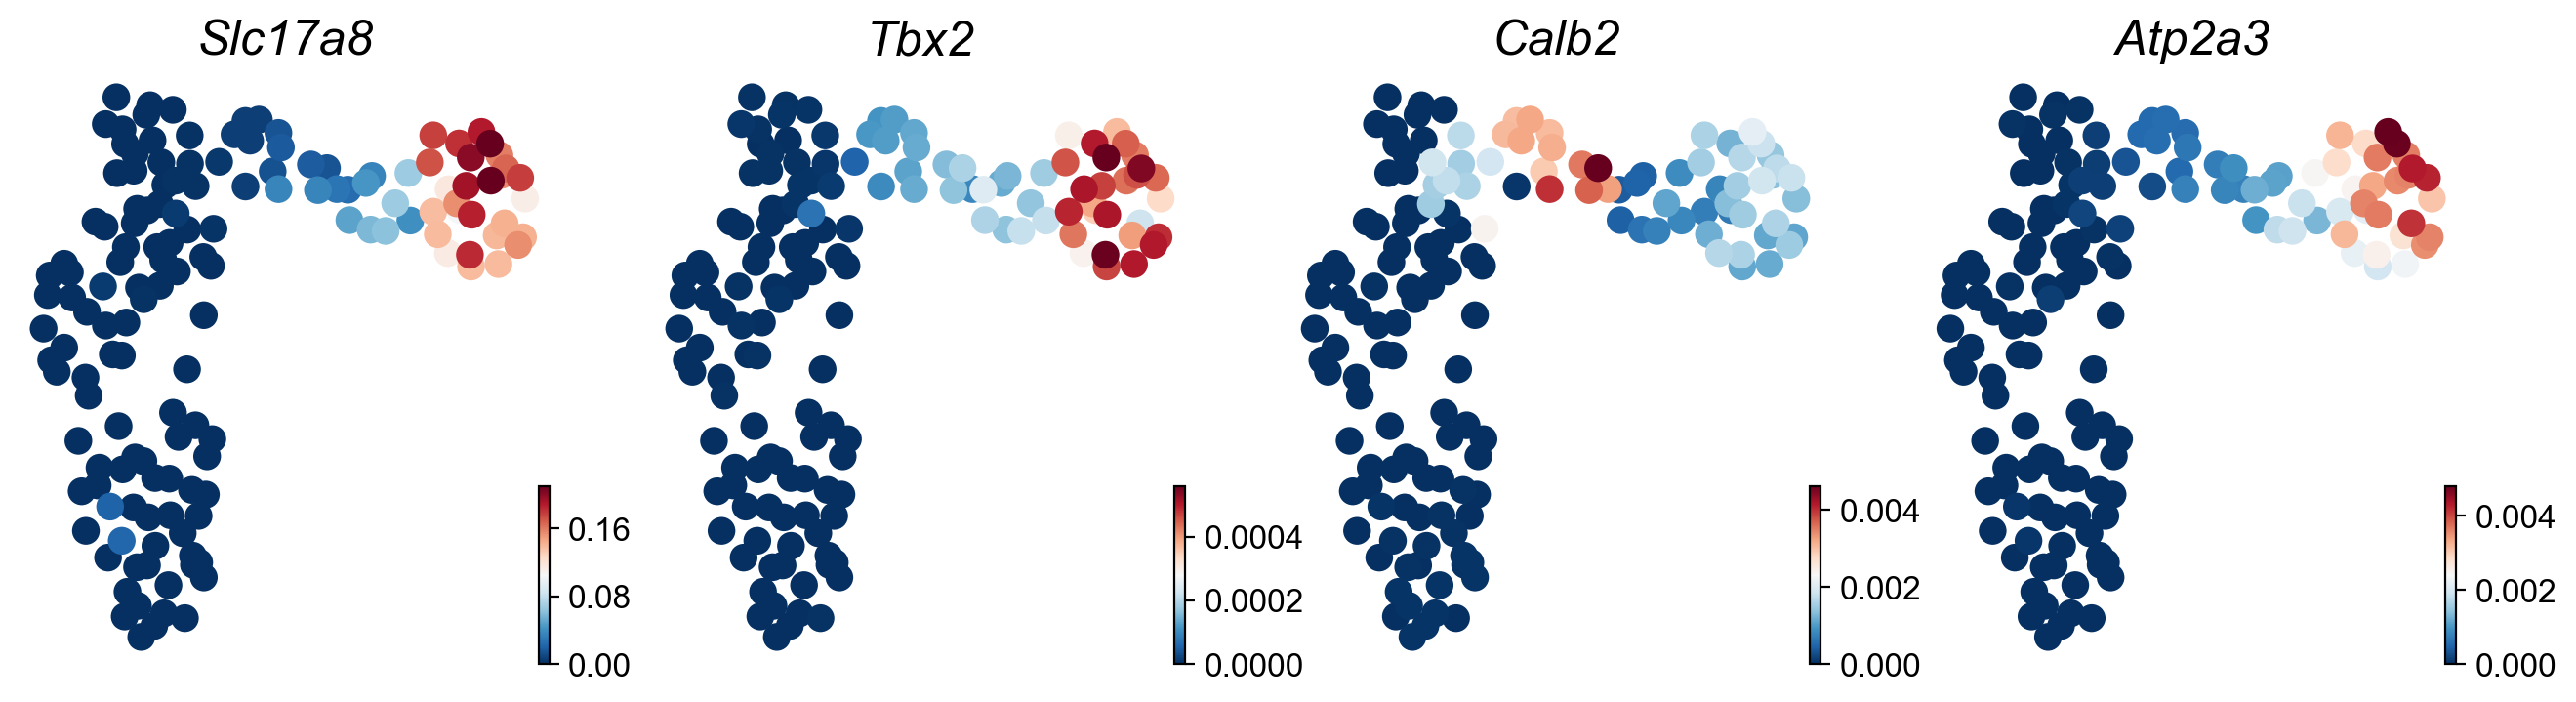

In [106]:
axs=scv.pl.umap(adata_mm_hc_sub,color=IHC,smooth=True,show=False)
for ax in axs:
    ax.set_title(ax.get_title(),style="italic",fontsize=18)
plt.savefig("figures/IHC_MOUSE.pdf",dpi=600)

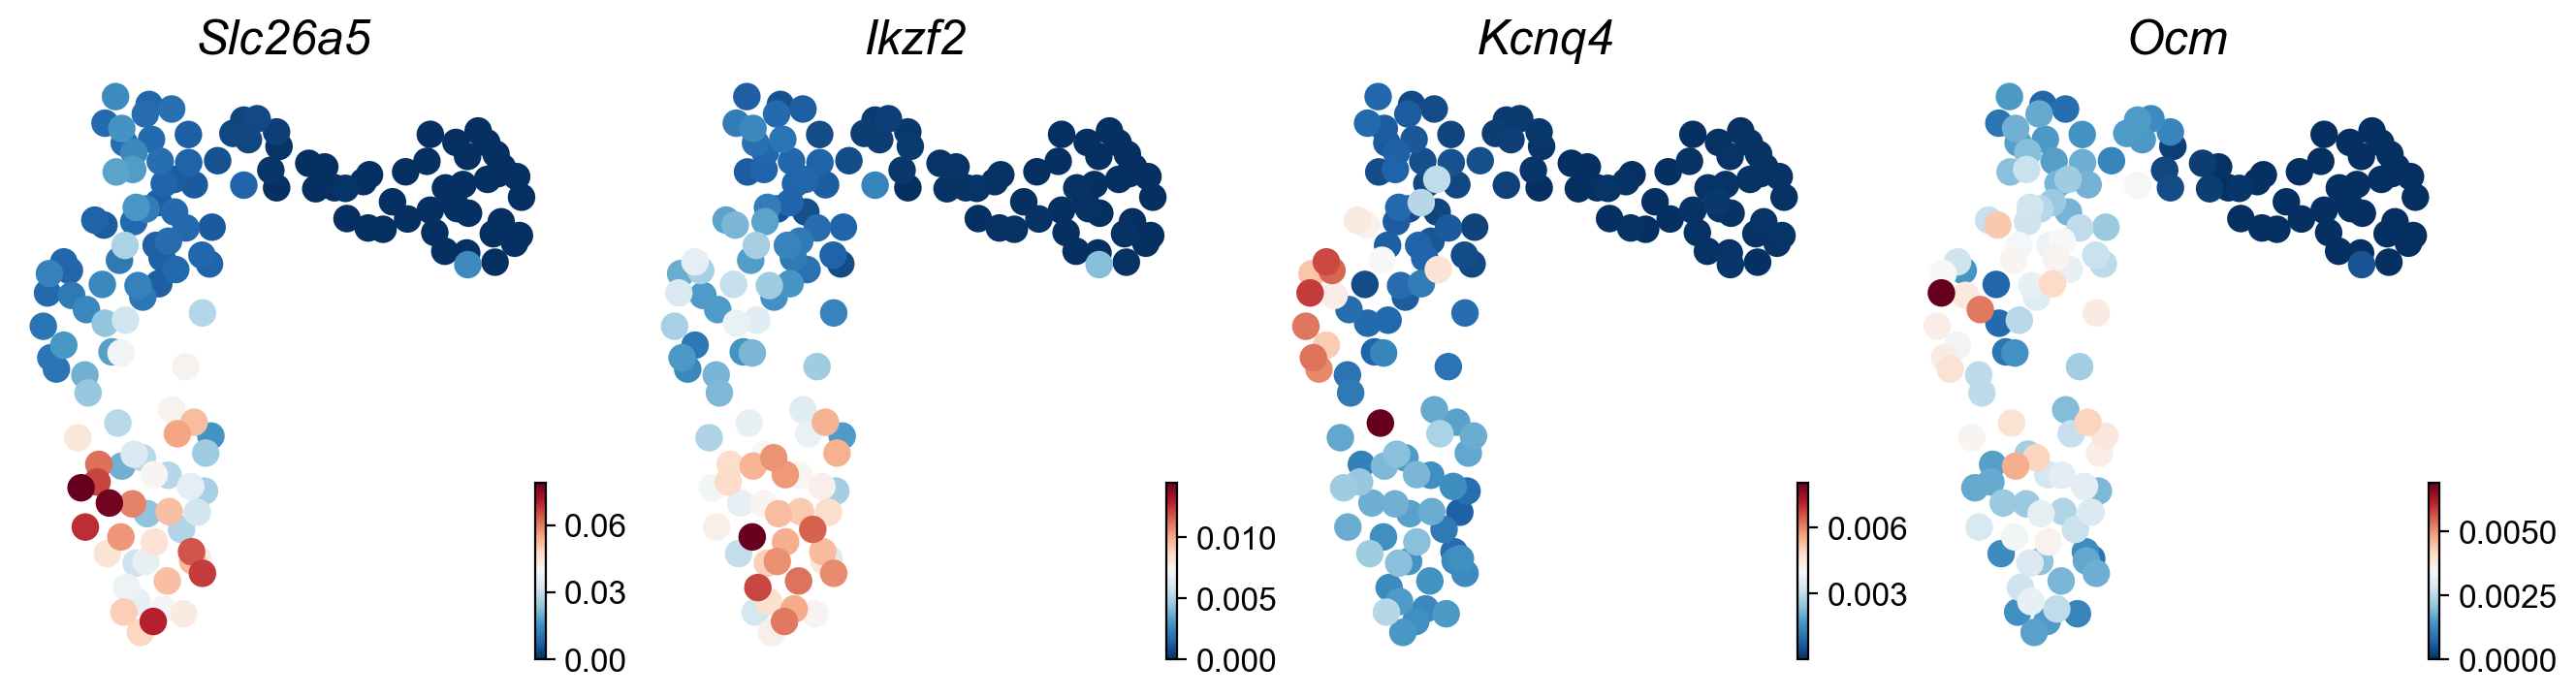

In [107]:
axs=scv.pl.umap(adata_mm_hc_sub,color=OHC,smooth=True,show=False)
for ax in axs:
    ax.set_title(ax.get_title(),style="italic",fontsize=18)
plt.savefig("figures/OHC_MOUSE.pdf",dpi=600)

In [42]:
sc.tl.score_genes(adata_mm_hc_sub,OHC,score_name="OHC")
sc.tl.score_genes(adata_mm_hc_sub,IHC,score_name="IHC")

In [43]:
adata_mm_hc_sub.obs["assigned"]="non assigned"
adata_mm_hc_sub.obs.loc[(adata_mm_hc_sub.obs.OHC>adata_mm_hc_sub.obs.IHC),"assigned"]="OHC"
adata_mm_hc_sub.obs.loc[(adata_mm_hc_sub.obs.IHC>adata_mm_hc_sub.obs.OHC),"assigned"]="IHC"

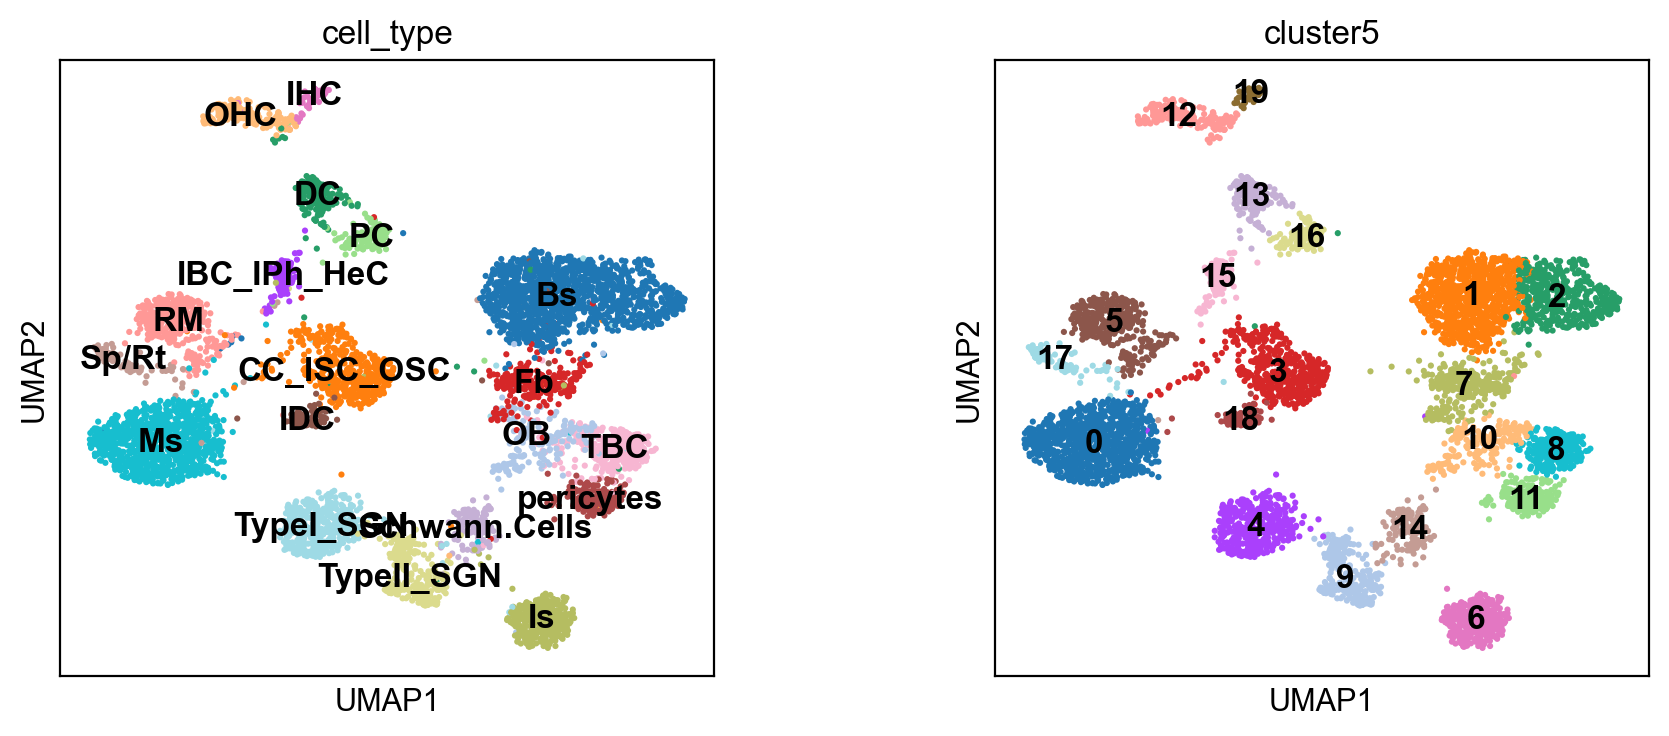

In [44]:
sc.pl.umap(adata_mouse,color=["cell_type",'cluster5'],legend_loc='on data', wspace=0.3)

In [45]:
adata_mouse.obs["sel1"]=(adata_mouse.obs.cell_type=='IHC').astype(str)
adata_mouse.obs["sel2"]=(adata_mouse.obs.cell_type=='OHC').astype(str)

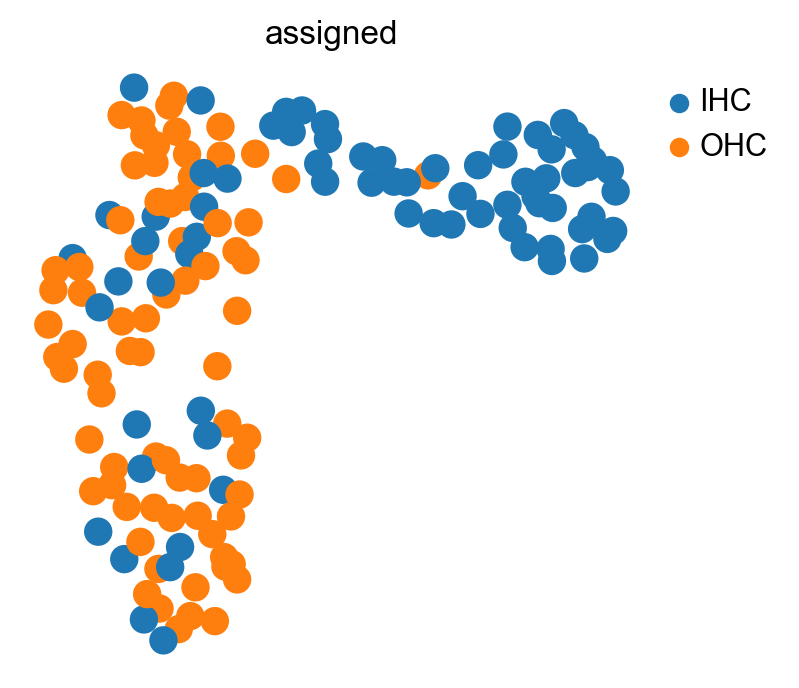

saving figure to file figures/cochear_HC_mouse2.pdf


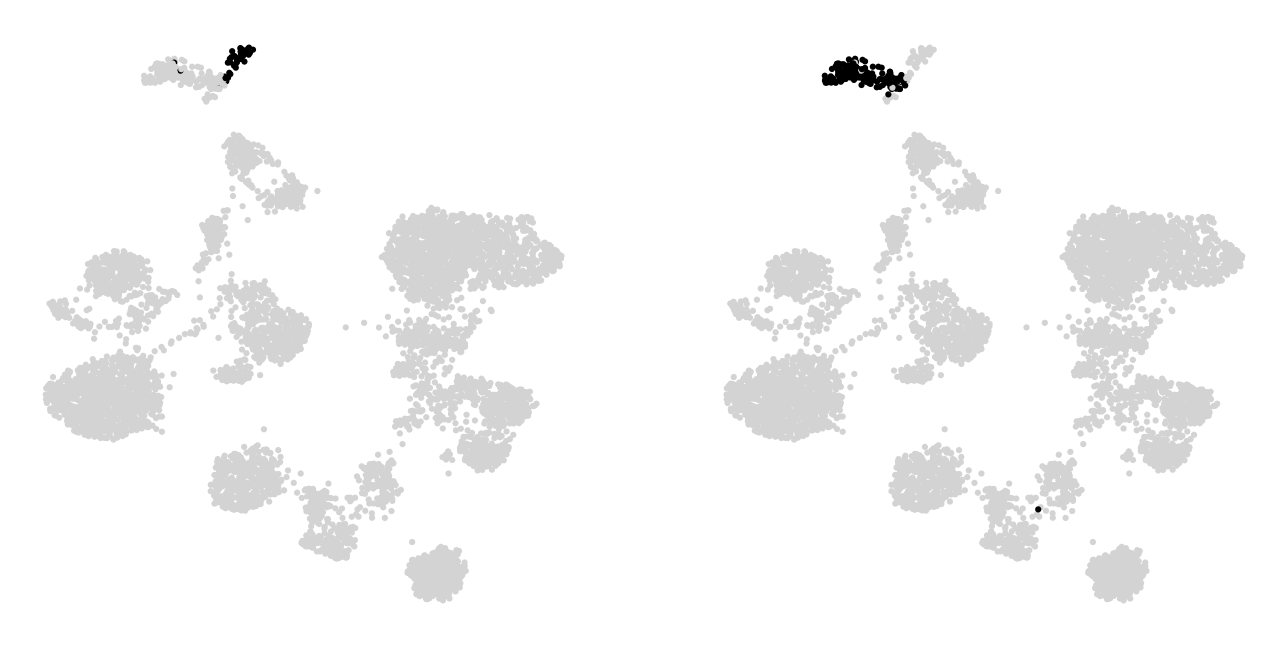

In [46]:
scv.pl.umap(adata_mm_hc_sub,color="assigned",palette=["tab:#ff7f00","tab:#1f78b4"])
scv.pl.umap(adata_mouse,color=["sel1","sel2"],palette=["lightgrey","k","k"],frameon=False,legend_loc="none",title="",save="figures/cochear_HC_mouse2.pdf")

In [47]:
from matplotlib.patches import ConnectionPatch

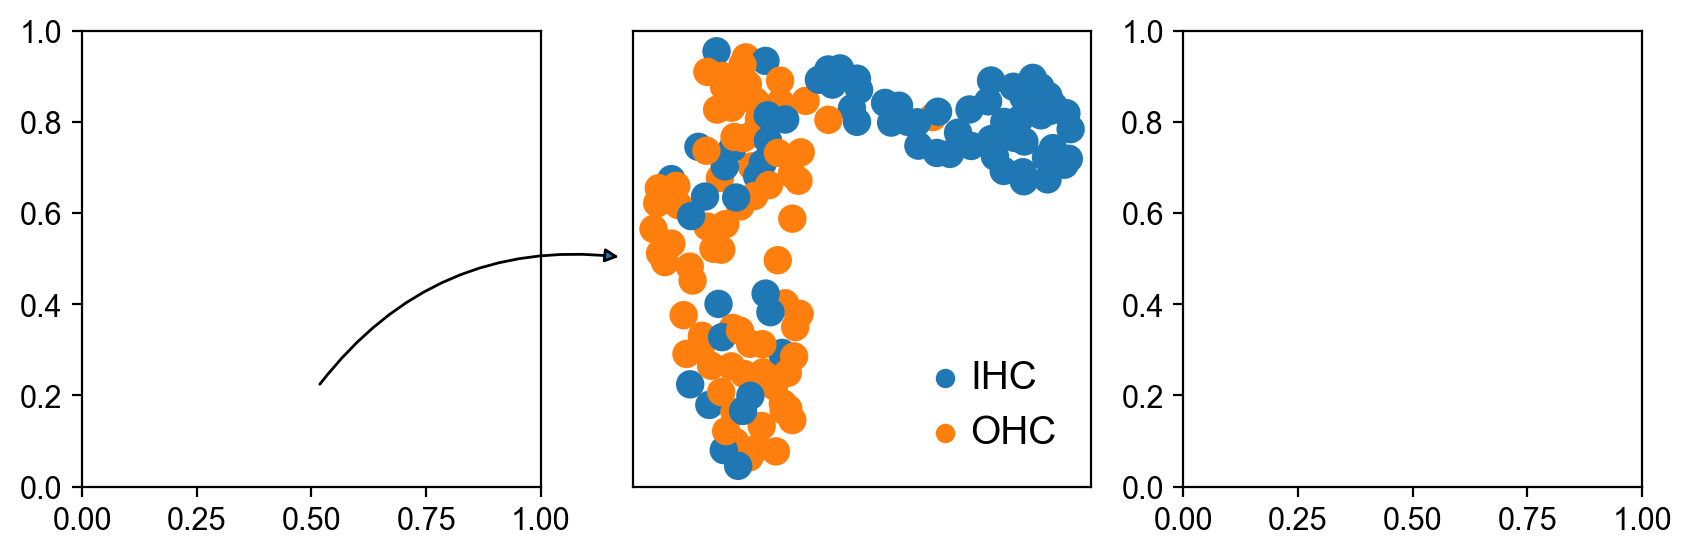

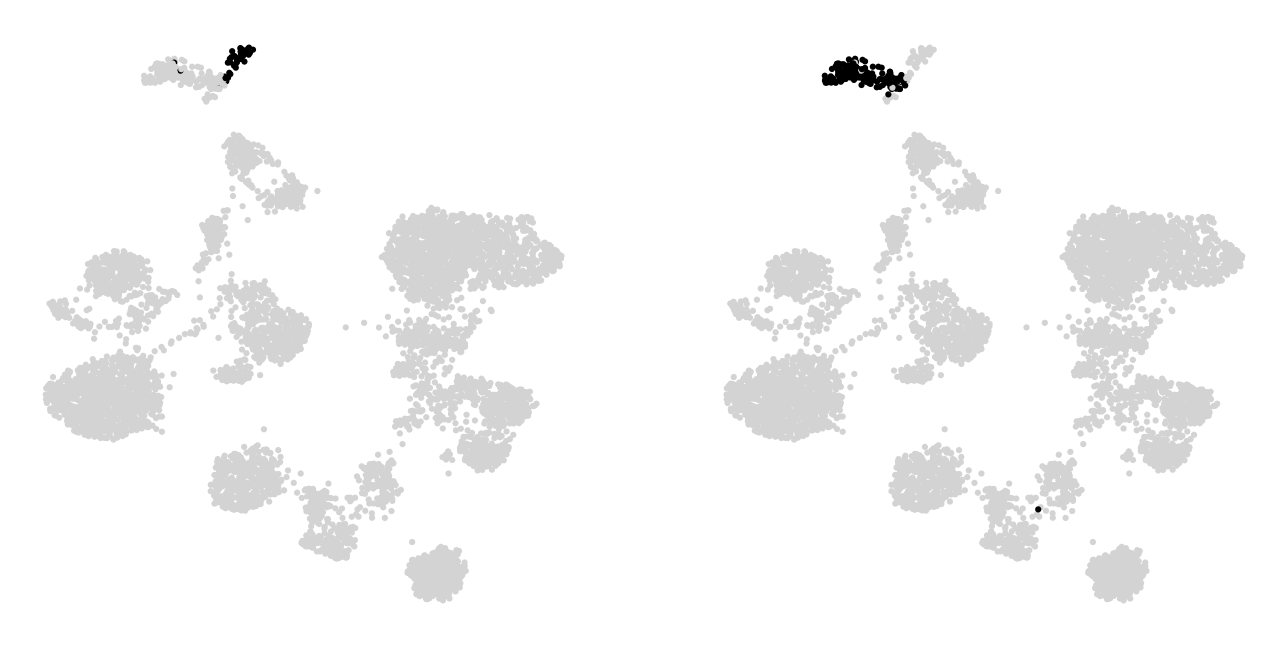

In [53]:
fig,axs=plt.subplots(1,3,figsize=(10,3))
scv.pl.umap(adata_mouse,color=["sel1","sel2"],ax=axs[0],show=False,
                  palette=["lightgrey","k","k"],frameon=False,legend_loc="none",title="")
scv.pl.umap(adata_mm_hc_sub,color="assigned",title="",frameon=True,ax=axs[1],legend_loc="none",show=False,palette=["tab:#ff7f00","tab:#1f78b4"])
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].legend(frameon=False,fontsize=14)

con1 = ConnectionPatch(xyA=(0.5, .2), coordsA="axes fraction", connectionstyle="arc3,rad=-0.3",arrowstyle="-|>",
                       xyB=(0, .5), coordsB="axes fraction", axesA=axs[0],axesB=axs[1],shrinkA=5,shrinkB=5)

axs[0].add_artist(con1)
plt.savefig("figures/cochear_HC_mouse.jpeg",dpi=600)

In [49]:
adata_mm_hc_sub

AnnData object with n_obs × n_vars = 147 × 15102
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5', 'OHC', 'IHC', 'assigned'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap', 'cluster5_colors', 'log1p', 'hvg', 'leiden_colors', 'cell_type_colors', 'assigned_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

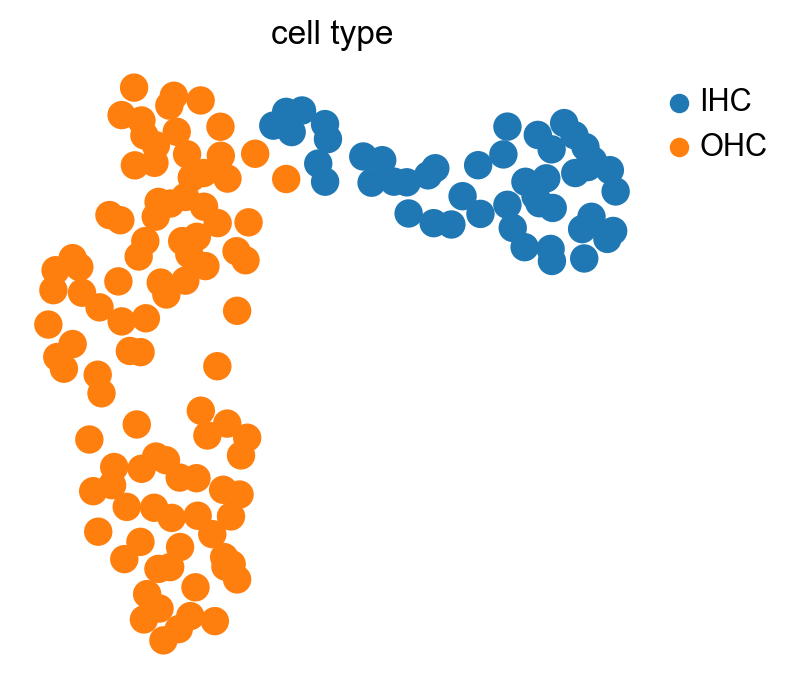

<Figure size 400x400 with 0 Axes>

In [61]:
scv.pl.umap(adata_mm_hc_sub,color="cell_type",palette=["tab:#ff7f00","tab:#1f78b4"])
plt.savefig("figures/cochear_HC_mouse.jpeg",dpi=600)

In [62]:
adata_mm_hc_sub.write("data/adata_mm_HC.h5ad")

In [66]:
sc.tl.rank_genes_groups(adata_mm_hc_sub,"cell_type",method="wilcoxon")

In [68]:
sc.get.rank_genes_groups_df(adata_mm_hc_sub,"IHC",pval_cutoff=0.05).shape[0]

1822

In [69]:
sc.get.rank_genes_groups_df(adata_mm_hc_sub,"OHC",pval_cutoff=0.5,log2fc_min=0).set_index("names").to_csv("data/MOUSE_OHC.csv")

In [70]:
sc.get.rank_genes_groups_df(adata_mm_hc_sub,"IHC",pval_cutoff=0.5,log2fc_min=0).set_index("names").to_csv("data/MOUSE_IHC.csv")

In [76]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
writer = pd.ExcelWriter('data/HC_MOUSE_DE.xlsx', engine='xlsxwriter')
for cl in adata_mm_hc_sub.obs.cell_type.cat.categories:
    sc.get.rank_genes_groups_df(adata_mm_hc_sub,cl,pval_cutoff=1,log2fc_min=0).set_index("names").to_excel(writer, 
                                                                     sheet_name=cl)
    
writer.save()

In [79]:
marker_genes = [
    *["Akap8l","Bcl6","Clock","Cux2",
     "Isl1","Mlxipl","Mtf2","Rest","Rorb","Smad1",
     "Tbx2","Tcf12","Zfp385a","Zfp462","Zfp821"], #IHC
    *["Cux1","Foxo3","Gpbp1","Hif1a","Ikzf2",
    "Mxi1","Pbx1","Sall3",
     "Sox6","Thrb","Zfp148"],#OHC
    
]

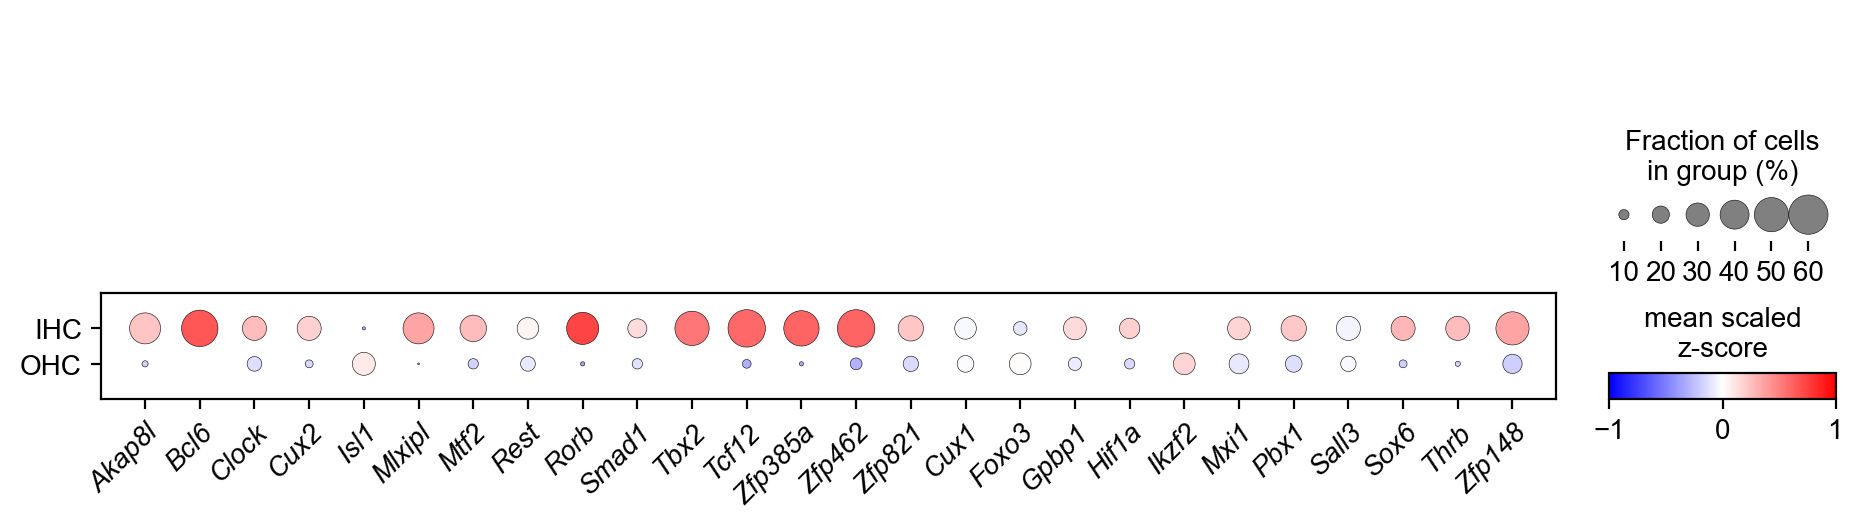

In [80]:
ax=sc.pl.dotplot(adata_mm_hc_sub,marker_genes,layer="scaled",groupby="cell_type",
                                   cmap="bwr", colorbar_title='mean scaled\nz-score',
                                   vmin=-1,vmax=1,show=False)
plt.setp(ax['mainplot_ax'].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor",style="italic");